# **Installations**

In [ ]:
!pip install selenium beautifulsoup4 PyPDF2 openpyxl python-docx
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium



Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [28.3 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [44.2 kB]
Get:13

In [ ]:
pip install requests beautifulsoup4 PyPDF2 openpyxl python-docx

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
!pip install selenium

In [ ]:
import fitz


In [ ]:
import openpyxl

In [ ]:
!pip install PyPDF2
!pip install openpyxl
!pip install python-docx
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.5 MB/s eta 0:00:00


# **Data Scraping**

In [ ]:
from PyPDF2 import PdfReader
from io import BytesIO
import openpyxl
from docx import Document
import requests

# Function to scrape text from PDF
def scrape_pdf_text(pdf_url):
    text = ""
    try:
        with requests.get(pdf_url, stream=True, timeout=30) as r:  # Set timeout to 30 seconds
            r.raise_for_status()  # Raise an exception for 4xx and 5xx status codes
            pdf_data = BytesIO(r.content)
            pdf_reader = PdfReader(pdf_data)
            for page in pdf_reader.pages:
                text += page.extract_text()
    except requests.RequestException as e:
        print(f"Error downloading PDF file: {e}")
        return None
    except Exception as e:
        print(f"Error reading PDF file: {e}")
        return None
    return text

# Function to scrape text from Excel
def scrape_excel_text(excel_url):
    text = ""
    workbook = openpyxl.load_workbook(excel_url)
    for sheet_name in workbook.sheetnames:
        sheet = workbook[sheet_name]
        for row in sheet.iter_rows():
            for cell in row:
                text += str(cell.value) + " "
            text += "\n"
    return text

# Function to scrape webpage content
def scrape_webpage(url):
    # Fetch webpage content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract text from webpage

    webpage_text = soup.get_text()

    # Find all PDF and Excel links
    pdf_links = [link.get('href') for link in soup.find_all('a', href=True) if link.get('href').endswith('.pdf')]
    excel_links = [link.get('href') for link in soup.find_all('a', href=True) if link.get('href').endswith('.xlsx')]

    # Scrape text from PDFs
    pdf_texts = [scrape_pdf_text(pdf_link) for pdf_link in pdf_links]

    # Scrape text from Excel files
    excel_texts = [scrape_excel_text(excel_link) for excel_link in excel_links]

    return webpage_text, pdf_texts, excel_texts

# Main function
def main():
    url = input("Web Page Link")
    webpage_text, pdf_texts, excel_texts = scrape_webpage(url)

    # Create a new Word document
    doc = Document()

    # Add webpage content to the document
    doc.add_heading("Webpage Content", level=1)
    doc.add_paragraph(webpage_text)

    # Add PDF content to the document
    for i, pdf_text in enumerate(pdf_texts, 1):
        doc.add_heading(f"PDF {i} Content", level=1)
        doc.add_paragraph(pdf_text)

    # Add Excel content to the document
    for i, excel_text in enumerate(excel_texts, 1):
        doc.add_heading(f"Excel {i} Content", level=1)
        doc.add_paragraph(excel_text)

    # Save the document
    doc.save("Travel_1.docx")
    print("Scraped data has been saved to file")

if __name__ == "__main__":
    main()


Web Page Linkhttps://www.fly.com/
Scraped data has been saved to file


# Pre **Processing**

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
import csv
from docx import Document

# Function to extract words from a Word document
def extract_words_from_docx(docx_file):
    doc = Document(docx_file)
    words = []
    for paragraph in doc.paragraphs:
        for word in paragraph.text.split():
            words.append(word.strip())
    return words

# Function to save words to a CSV file
def save_words_to_csv(words, csv_file):
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        for word in words:
            writer.writerow([word])

# Loop from 3 to 15
for i in range(1, 16):
    docx_file_path = f'/content/Travel_{i}.docx'
    csv_file_path = f'/content/Travel_{i}_words.csv'

    # Extract words from the Word document
    words = extract_words_from_docx(docx_file_path)

    # Save words to the CSV file
    save_words_to_csv(words, csv_file_path)

    print(f"Words have been saved to CSV file: {csv_file_path}")


Words have been saved to CSV file: /content/Travel_1_words.csv
Words have been saved to CSV file: /content/Travel_2_words.csv
Words have been saved to CSV file: /content/Travel_3_words.csv
Words have been saved to CSV file: /content/Travel_4_words.csv
Words have been saved to CSV file: /content/Travel_5_words.csv
Words have been saved to CSV file: /content/Travel_6_words.csv
Words have been saved to CSV file: /content/Travel_7_words.csv
Words have been saved to CSV file: /content/Travel_8_words.csv
Words have been saved to CSV file: /content/Travel_9_words.csv
Words have been saved to CSV file: /content/Travel_10_words.csv
Words have been saved to CSV file: /content/Travel_11_words.csv
Words have been saved to CSV file: /content/Travel_12_words.csv
Words have been saved to CSV file: /content/Travel_13_words.csv
Words have been saved to CSV file: /content/Travel_14_words.csv
Words have been saved to CSV file: /content/Travel_15_words.csv


In [ ]:
!pip install pandas nltk


In [ ]:
import pandas as pd
import nltk
import string
import spacy
from nltk.stem import PorterStemmer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load spaCy model and NLTK stop words
nlp = spacy.load("en_core_web_sm")
stop_words = set(nltk.corpus.stopwords.words("english"))
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove stop words and punctuation
    words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]

    return words

# Function to preprocess the text
def preprocess_document(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation and non-alphanumeric characters
    doc = nlp(text)
    stems = [stemmer.stem(token.text).lower() for token in doc if token.text.lower() not in stop_words and token.text.isalpha()]  # Filter out stop words and non-alphabetic words

    return stems

# Iterate over numbers from 1 to 15
for i in range(1, 16):
    # Load the CSV file
    df = pd.read_csv(f"/content/Travel_{i}_words.csv")

    # Drop rows with empty cells
    df = df.dropna()

    # Preprocess the text in each row using both functions
    df['Preprocessed_Text'] = df['Webpage'].apply(preprocess_text)
    df['Preprocessed_Document'] = df['Webpage'].apply(preprocess_document)

    # Remove empty lists after preprocessing
    df = df[df['Preprocessed_Text'].apply(len) > 0]
    df = df[df['Preprocessed_Document'].apply(len) > 0]

    # Save the preprocessed data to a new CSV file
    df.to_csv(f"/content/Travel_{i}_processed_words.csv", index=False)
    print(f"Done processing iteration {i}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Done processing iteration 1
Done processing iteration 2
Done processing iteration 3
Done processing iteration 4
Done processing iteration 5
Done processing iteration 6
Done processing iteration 7
Done processing iteration 8
Done processing iteration 9
Done processing iteration 10
Done processing iteration 11
Done processing iteration 12
Done processing iteration 13
Done processing iteration 14
Done processing iteration 15


In [ ]:
import pandas as pd

# Initialize an empty list to store DataFrame objects
dfs = []

# Iterate over numbers from 1 to 15
for i in range(1, 16):
    # Load the processed CSV file
    df = pd.read_csv(f"/content/Travel_{i}_processed_words.csv")

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list
result_df = pd.concat(dfs, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
result_df.to_csv("/content/all_processed_words.csv", index=False)


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/all_processed_words.csv")

# Remove duplicate rows
df = df.drop_duplicates()

# Save the DataFrame to a new CSV file
df.to_csv("/content/all_processed_words_no_duplicates.csv", index=False)


# **KNN Implementation and Graph Making**


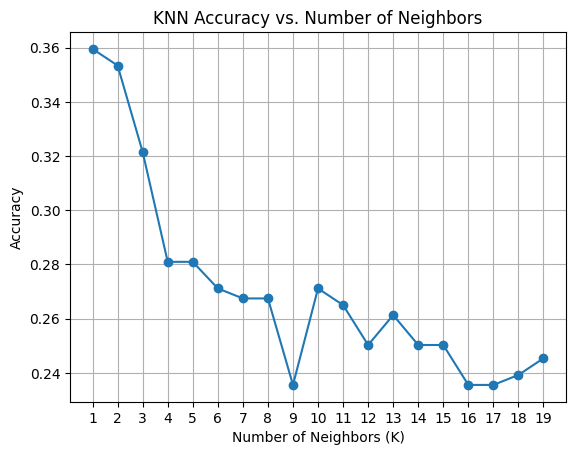

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the data from the CSV file
df = pd.read_csv("/content/all_processed_words_no_duplicates.csv")

# Step 2: Preprocess the text data (if necessary)

# Step 3: Split the data into features (X) and target variable (y)
X = df['Preprocessed_Document']
y = df['Preprocessed_Document']  # Replace 'your_target_column' with the actual name of your target column

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Implement the KNN algorithm
k_values = range(1, 20)
accuracies = []

# Step 7: Train the model on the training data and evaluate on testing data
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred = knn.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Step 8: Draw a graph to visualize the results
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


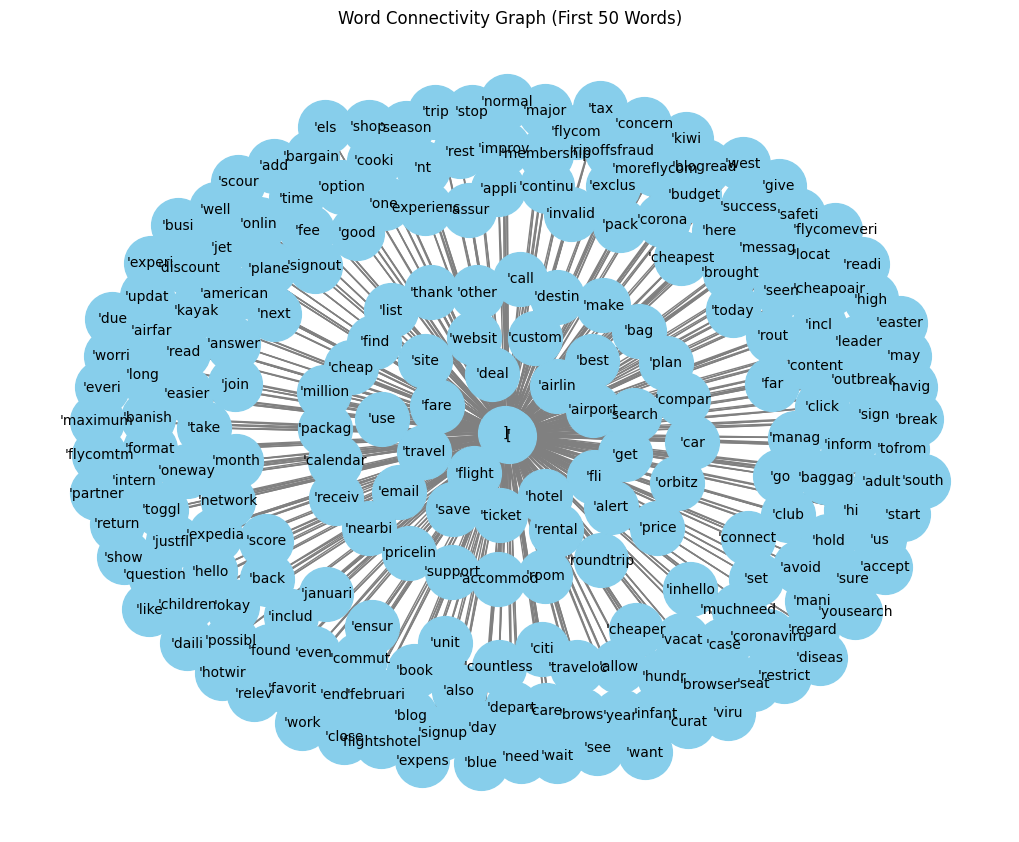

In [126]:
import pandas as pd
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("/content/all_processed_words_no_duplicates.csv")

# Tokenize the text data into words
all_words = [word_tokenize(text) for text in df['Preprocessed_Document']]

# Take only the first 50 words
all_words_50 = all_words[:300]

# Create a graph
G = nx.Graph()

# Add edges between words based on their connectivity
for words in all_words_50:
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            if G.has_edge(words[i], words[j]):
                # Increment the weight of the edge if it already exists
                G[words[i]][words[j]]['weight'] += 1
            else:
                # Add a new edge with weight 1 if it doesn't exist
                G.add_edge(words[i], words[j], weight=1)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10)
plt.title('Word Connectivity Graph (First 50 Words)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


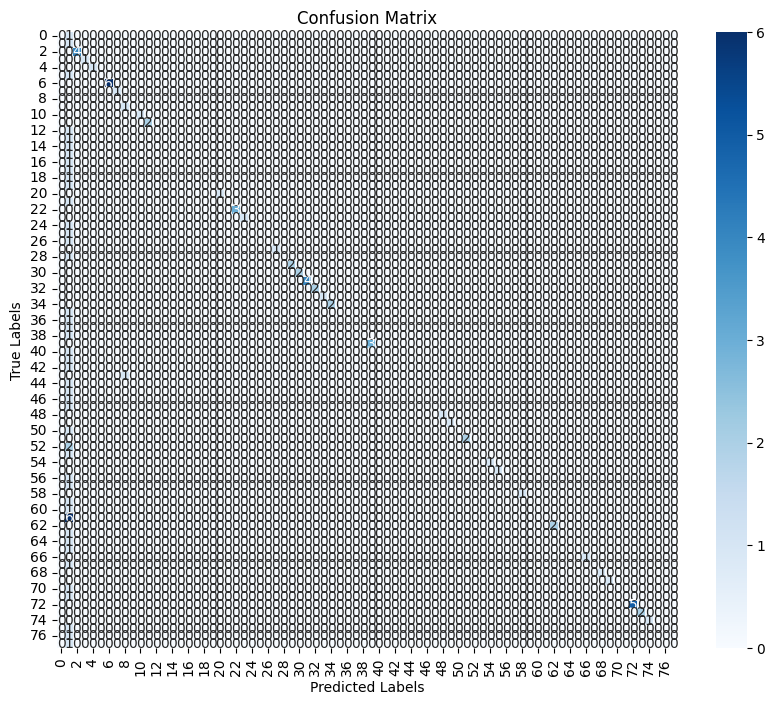

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load the data
df = pd.read_csv("Travel_1_processed_words.csv")

# Define the target column name
target_column = 'Preprocessed_Document'  # Target column name

# Split the data into features (X) and target variable (y)
X = df[target_column]
y = df[target_column]

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with colors
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
